In [2]:
# Download data from
# https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
# data provided by Convolutional_neural_network with tensorflow course on coursera

In [5]:
import os

base_dir = 'E:\Work_Space\JupyterNotebooks\cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#Directory with training cat/dogs pictures 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#Directory with validation cat/dogs pictures 
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [6]:
train_cat_frames = os.listdir(train_cats_dir)
train_dog_frames = os.listdir(train_dogs_dir)

print(train_cat_frames[:10])
print(train_dog_frames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [7]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
             loss='binary_crossentropy',
              metrics = 'accuracy')

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
history = model.fit(train_generator,
                   validation_data=validation_generator,
                   steps_per_epoch=100,
                   epochs=15,
                   validation_steps=50,
                   verbose=2)

Epoch 1/15
100/100 - 39s - loss: 0.9064 - accuracy: 0.5510 - val_loss: 0.6678 - val_accuracy: 0.5620
Epoch 2/15
100/100 - 25s - loss: 0.6594 - accuracy: 0.6385 - val_loss: 0.5877 - val_accuracy: 0.6810
Epoch 3/15
100/100 - 26s - loss: 0.5710 - accuracy: 0.7160 - val_loss: 0.5927 - val_accuracy: 0.6810
Epoch 4/15
100/100 - 25s - loss: 0.5038 - accuracy: 0.7545 - val_loss: 0.5773 - val_accuracy: 0.7210
Epoch 5/15
100/100 - 25s - loss: 0.4316 - accuracy: 0.7985 - val_loss: 0.7305 - val_accuracy: 0.6760
Epoch 6/15
100/100 - 25s - loss: 0.3604 - accuracy: 0.8390 - val_loss: 0.6427 - val_accuracy: 0.7360
Epoch 7/15
100/100 - 25s - loss: 0.2699 - accuracy: 0.8835 - val_loss: 1.0300 - val_accuracy: 0.6730
Epoch 8/15
100/100 - 25s - loss: 0.1934 - accuracy: 0.9220 - val_loss: 0.9173 - val_accuracy: 0.7140
Epoch 9/15
100/100 - 25s - loss: 0.1594 - accuracy: 0.9345 - val_loss: 0.9659 - val_accuracy: 0.7000
Epoch 10/15
100/100 - 25s - loss: 0.1009 - accuracy: 0.9595 - val_loss: 0.8303 - val_accura

In [32]:
# run predection using the model
import numpy as np
from keras.preprocessing import image

path='dog2.jpg'

img=image.load_img(path, target_size=(150, 150))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images, batch_size=10)

print(classes[0])
  
if classes[0]>0:
    print("It is a dog")
    
else:
    print("It is a cat")

[1.]
It is a dog


C:\Users\shouk\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


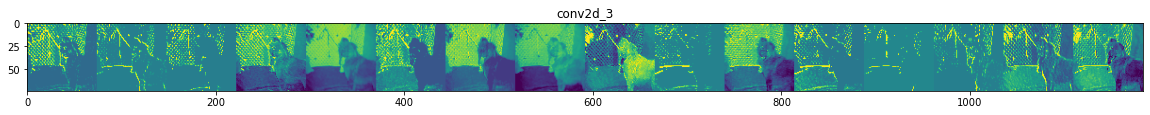

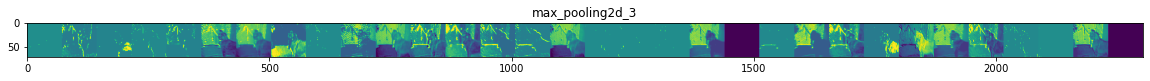

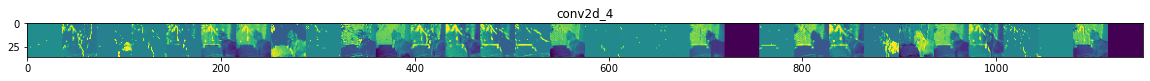

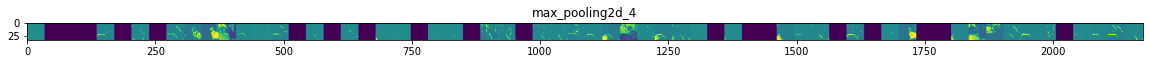

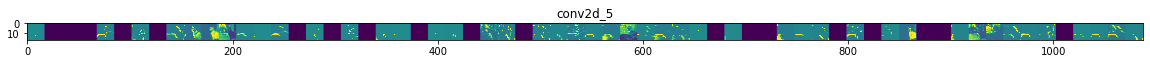

In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_frames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_frames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

x /= 255.0

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# display the representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

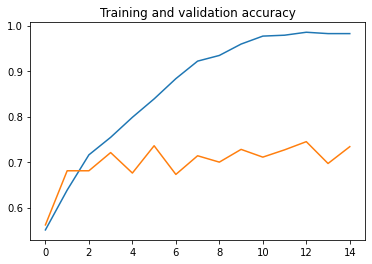

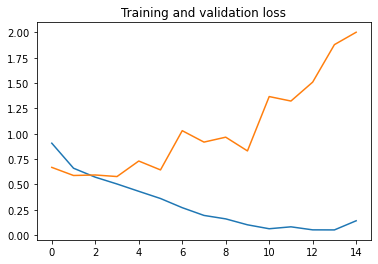

In [30]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )